<a href="https://colab.research.google.com/github/rpolea/CE888/blob/main/Lab_6/Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

!git clone https://github.com/sagihaider/CE888_2021.git

fatal: destination path 'CE888_2021' already exists and is not an empty directory.


In [20]:
import pandas as pd
import numpy as np

In [17]:
country = pd.read_csv('CE888_2021/Lab_6/Data/Country-data.csv')
data_dict = pd.read_csv('CE888_2021/Lab_6/Data/data-dictionary.csv')

In [18]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [63]:
data_dict.head(20)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [31]:
country_info = country.drop(columns =['country'])

In [32]:
country_info.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
from sklearn import cluster, datasets, metrics
km=cluster.KMeans(n_clusters=3)
km.fit(country_info)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(country_info, km.labels_))

Silhouette Coefficient: 0.700


In [36]:
country['Cluster'] = km.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [41]:
country['Cluster'].value_counts()

0    128
2     32
1      7
Name: Cluster, dtype: int64

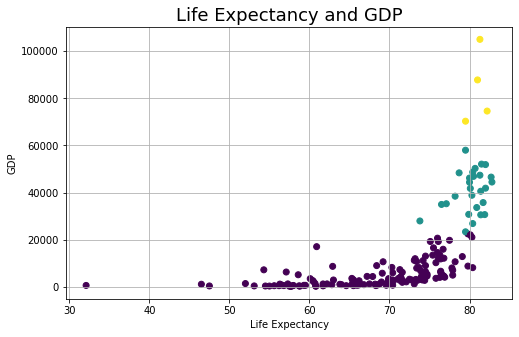

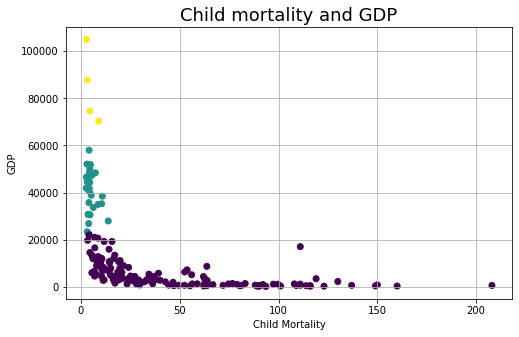

In [97]:
plt.figure(figsize=(8,5))
plt.title("Life Expectancy and GDP", fontsize=18)
plt.grid(True)
plt.scatter(country['life_expec'],country['gdpp'],c=km.labels_)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.show()
plt.figure(figsize=(8,5))
plt.title("Child mortality and GDP", fontsize=18)
plt.grid(True)
plt.scatter(country['child_mort'],country['gdpp'],c=km.labels_)
plt.xlabel('Child Mortality')
plt.ylabel('GDP')
plt.show()

GDP, Life Expectancy and Child Mortality are all core indicators of development. 

From the scatter plots above we can see clusters clearly separated:

Cluster 1 (Purple) is under-developing countries,
Cluster 2 (Green) is developing countries,
Cluster 3 (Yellow) is developed countries.

In [106]:
Cluster_1 = country.loc[country['Cluster'] == 0]
Cluster_2 = country.loc[country['Cluster'] == 2]
Cluster_3 = country.loc[country['Cluster'] == 1]

In [107]:
#Cluster 1 - Under-developed
Cluster_1.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0


In [108]:
#Cluster 2 - Developing
Cluster_2.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2


In [109]:
#Cluster 3 - Developed
Cluster_3.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1
